### Import Data

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder


### Read & Check Data

In [111]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()
#test.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [114]:
#train.shape

In [115]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [116]:
train.describe(include=['O'])

Name   Sex  Ticket Cabin Embarked
count                  891   891     891   204      889
unique                 891     2     681   147        3
top     Otter, Mr. Richard  male  347082    G6        S
freq                     1   577       7     4      644

### Functions Definitions

In [117]:
def get_title(name):
    if '.' in name:
        title = name.split(', ')[1].split('. ')[0]
    else:
        title = 'Unknown'
        
    return title


def get_cabin_type(cabin):
    if pd.isnull(cabin):
        cabin_type = 'X'
    else:
        cabin_type = cabin[0]
    
    return cabin_type

# Cabin Type X is missing


### New Features

In [118]:
train['Title'] = train.Name.apply(get_title)
train['Cabin_Type'] = train.Cabin.apply(get_cabin_type)

test['Title'] = test.Name.apply(get_title)
test['Cabin_Type'] = test.Cabin.apply(get_cabin_type)


train.head()
#test.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title Cabin_Type  
0      0         A/5 21171   7.2500   NaN        S    Mr          X  
1      0          PC 17599  71.2833   C85        C   Mrs          C  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss          X  
3      0            113803  53.1000  C123        S   Mrs          C  
4      0            373450   8.0500   NaN        S    Mr          X

In [119]:
#train.shape
#train.Cabin_Type.value_counts()

### Missing Data

In [120]:
train.dropna(subset=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], inplace=True)
test.dropna(subset=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], inplace=True)

train.shape

(712, 14)

### Encoding Categorical Data

In [121]:
# Get Dummies

#train_enc_dum = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_Type'])
#train_enc_dum.columns
#train_enc_dum[['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
#       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
#       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_Type_A', 'Cabin_Type_B',
#       'Cabin_Type_C', 'Cabin_Type_D', 'Cabin_Type_E', 'Cabin_Type_F',
#       'Cabin_Type_G', 'Cabin_Type_T']].head()

In [122]:
## Binary Encoder

#be = BinaryEncoder(cols=['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_Type'])
#train_enc_be = be.fit_transform(train)
#train_enc_be[['Pclass_0', 'Pclass_1', 'Sex_0', 'Embarked_0', 'Embarked_1',
#              'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Cabin_Type_0', 
#              'Cabin_Type_1', 'Cabin_Type_2']].head()

In [123]:
# Encoding Data

train_enc = pd.get_dummies(data=train, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_Type'])
test_enc = pd.get_dummies(data=test, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_Type'])

train_enc.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess', 'Cabin_Type_A', 'Cabin_Type_B', 'Cabin_Type_C',
       'Cabin_Type_D', 'Cabin_Type_E', 'Cabin_Type_F', 'Cabin_Type_G',
       'Cabin_Type_T', 'Cabin_Type_X'],
      dtype='object')

### Removing Unneeded Data

In [124]:
train_enc.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_enc.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

train_enc.head()

Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0      1      0   7.2500         0         0         1   
1         1  38.0      1      0  71.2833         1         0         0   
2         1  26.0      0      0   7.9250         0         0         1   
3         1  35.0      1      0  53.1000         1         0         0   
4         0  35.0      0      0   8.0500         0         0         1   

   Sex_female  Sex_male      ...       Title_the Countess  Cabin_Type_A  \
0           0         1      ...                        0             0   
1           1         0      ...                        0             0   
2           1         0      ...                        0             0   
3           1         0      ...                        0             0   
4           0         1      ...                        0             0   

   Cabin_Type_B  Cabin_Type_C  Cabin_Type_D  Cabin_Type_E  Cabin_Type_F  \
0             0             0             0             0             0   
1             0             1             0             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             0             0             0             0             0   

   Cabin_Type_G  Cabin_Type_T  Cabin_Type_X  
0             0             0             1  
1             0             0             0  
2             0             0             1  
3             0             0             0  
4             0             0             1  

[5 rows x 39 columns]

### Data Preparation for Modelling

In [127]:
# Features & Lables
X = train_enc.drop('Survived', axis=1)
y = train_enc['Survived']


# Scaling Data
std_scale = StandardScaler()
X = std_scale.fit_transform(X)


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Model Creation

#### Base Model

In [139]:
# Model
def base_model(X):
    y = np.zeros(X.shape[0])
    return y


# Predict
y_base = base_model(X_test)


# Score
accuracy = accuracy_score(y_true=y_test, y_pred=y_base)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_base)
class_report = classification_report(y_true=y_test, y_pred=y_base)

print('Accuracy Score: ' + str(accuracy))
print('ROC AUC Score: \n' + str(roc_auc))
print('Classification Score : \n' + str(class_report))

Accuracy Score: 0.58041958042
ROC AUC Score: 
0.5
Classification Score : 
             precision    recall  f1-score   support

          0       0.58      1.00      0.73        83
          1       0.00      0.00      0.00        60

avg / total       0.34      0.58      0.43       143



/home/paresh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression

Accuracy Score: 0.804195804196
ROC AUC Score: 
0.796686746988
Classification Score : 
             precision    recall  f1-score   support

          0       0.82      0.84      0.83        83
          1       0.78      0.75      0.76        60

avg / total       0.80      0.80      0.80       143



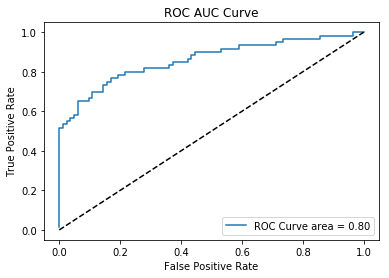

In [158]:
# Model
model = LogisticRegression(random_state=123)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_pred)
class_report = classification_report(y_true=y_test, y_pred=y_pred)

print('Accuracy Score: ' + str(accuracy))
print('ROC AUC Score: \n' + str(roc_auc))
print('Classification Score : \n' + str(class_report))

# ROC Curve
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label = 'ROC Curve area = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()